In [1]:
from typing import Callable, List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator

from Model import *
from SubjectiveLogic import Hyperopinion
from SubjectiveLogic import Hyperopinion as W
from SubjectiveLogic import HyperopinionInterface
from SubjectiveLogic.BeliefFusion import (averaging_fusion, cumulative_fusion,
                                          weighted_fusion)
from SubjectiveLogic.Trust import trust_discount_2e

import math


In [2]:
def simulate(belief_array: BeliefArray, influence_graph: InfluenceGraph = [[1, 1], [1, 1]], steps=100) -> SLModel:
    akv_model = AKVModel(belief_array, influence_graph)
    sl_model_cumulative = akv_to_sl(akv_model)
    # print(sl_model_cumulative.states[0][0].P[0], sl_model_cumulative.states[0][1].P[0])
    sl_model_cumulative.simulate(steps, cumulative_fusion)
    return sl_model_cumulative


In [3]:
def findFixedPoint(beliefA: float) -> float:
    def f(x):
        a = simulate([beliefA, x]).states[-1][1].P[0]
        return a

    def binarySearch(low: float, high: float) -> float:
        if (high >= low):
            mid = low + (high - low) / 2
        fmid = f(mid)
        if fmid < beliefA:
            return binarySearch(mid, high)
        if np.isclose(beliefA, fmid):
            return mid
        if fmid > beliefA:
            return binarySearch(low, mid)

    return binarySearch(0.5 + 0.001, 1 - 0.001)


In [4]:
findFixedPoint(0.3)

0.5999995
0.33451649999999994
0.17846250000000002
0.25870750000000003
0.2971445
0.3159625
0.30658650000000004
0.3018755
0.2995115
0.3006935
0.3001035
0.29980749999999995
0.29995449999999996
0.3000295
0.29999349999999997
0.3000115
0.3000015


0.6111115264892577

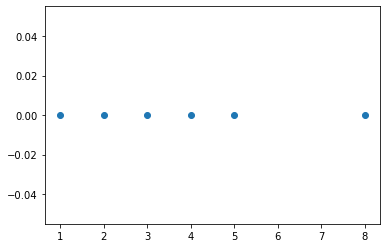

In [5]:
ar = np.array([1, 2, 3, 8, 4, 5])
plt.scatter(ar, [0] * ar.shape[0])